# MarlimR3D - Resistivity sections and Survey

In [1]:
import discretize
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
%matplotlib notebook

## Load section and survey

In [3]:
with np.load('marlim_sections.npz') as d:
    res_h = d['res_h']
    res_v = d['res_v']

    mesh = discretize.TensorMesh(h=[d['hx'], d['hy'], d['hz']], origin=d['x0'])

data = xr.load_dataset('marlim_data.nc', engine='h5netcdf')

## Figure

<IPython.core.display.Javascript object>


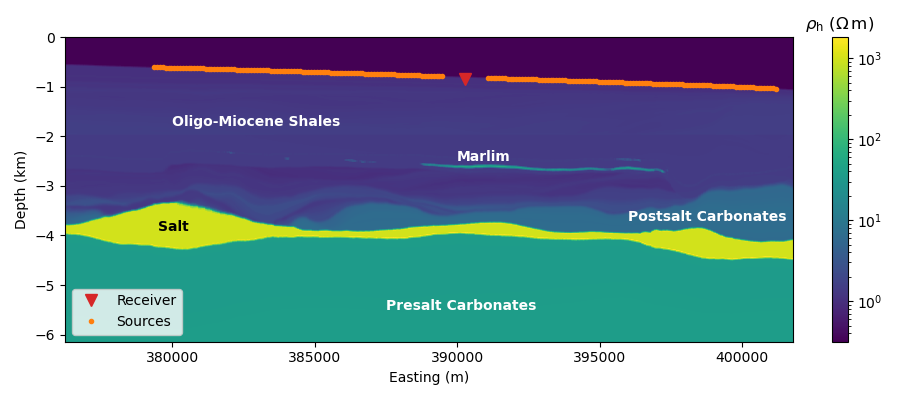

In [4]:
# Initiate figure.
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

# Plot resistivity and anisotropy
cb = ax.pcolormesh(mesh.nodes_x, mesh.nodes_z/1e3,
                   res_h.T, rasterized=True, norm=LogNorm())

# Add survey.
ax.plot(data.attrs['rec_x'], data.attrs['rec_z']/1e3, 'C3v', ms=8, label='Receiver')
ax.plot(data.src_x[::2], data.data_il.attrs['src_z']/1e3, 'C1.', label=f"Sources")

# Titles, labels, colorbar.
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Depth (km)')

c = fig.colorbar(cb, ax=ax, fraction=0.025)
c.ax.set_title(r'$\rho_\mathrm{h}~(\Omega\,$m)')

# Annotations.
ax.annotate('Oligo-Miocene Shales', (380000, -1.8), color='w', fontweight='bold')
ax.annotate('Marlim', (390000, -2.5), color='w', fontweight='bold')
ax.annotate('Postsalt Carbonates', (396000, -3.7), color='w', fontweight='bold')
ax.annotate('Salt', (379500, -3.9), fontweight='bold')
ax.annotate('Presalt Carbonates', (387500, -5.5), color='w', fontweight='bold')

ax.legend()

# Finish and save.
fig.tight_layout()
plt.savefig(f'../manuscript/figures/model-marlim.png', bbox_inches='tight', dpi=300)
fig.show()

In [5]:
import scooby
scooby.Report(['xarray', 'discretize', 'h5netcdf'])

--------------------------------------------------------------------------------
  Date: Thu Jan 28 20:46:29 2021 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.8.0 | packaged by conda-forge | (default, Nov 22 2019, 19:11:38)
  [GCC 7.3.0]

            xarray : 0.16.2
        discretize : 0.6.2
          h5netcdf : 0.8.1
             numpy : 1.19.5
             scipy : 1.6.0
           IPython : 7.19.0
        matplotlib : 3.3.3
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.4 Product Build 20200917 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------